In [2]:
#!pip install xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost


In [3]:
data = pd.read_csv(r"C:\Users\SREE CHARITHA\Documents\Downloads\traffic volume.csv")

In [4]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,9:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [5]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [7]:
data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [8]:
data['temp']=data['temp'].fillna(data['temp'].mean())
data['rain']=data['rain'].fillna(data['rain'].mean())
data['snow']=data['snow'].fillna(data['snow'].mean())

In [9]:
from collections import Counter

In [10]:
print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [11]:
data['weather']=data['weather'].fillna('Clouds')

In [12]:
data.isnull().sum()

holiday           48143
temp                  0
rain                  0
snow                  0
weather               0
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['weather']=le.fit_transform(data['weather'])
data['holiday']=le.fit_transform(data['holiday'])


In [14]:
import matplotlib.pyplot as plt

In [15]:
data.select_dtypes(include='number').corr()

,holiday,temp,rain,snow,weather,traffic_volume
holiday,1.000000,0.004646,0.000177,0.000863,-0.001851,0.038057
temp,0.004646,1.000000,0.009070,-0.019758,-0.033559,0.130034
rain,0.000177,0.009070,1.000000,-0.000090,0.009542,0.004714
snow,0.000863,-0.019758,-0.000090,1.000000,0.036662,0.000735
weather,-0.001851,-0.033559,0.009542,0.036662,1.000000,-0.040035
traffic_volume,0.038057,0.130034,0.004714,0.000735,-0.040035,1.000000


3333

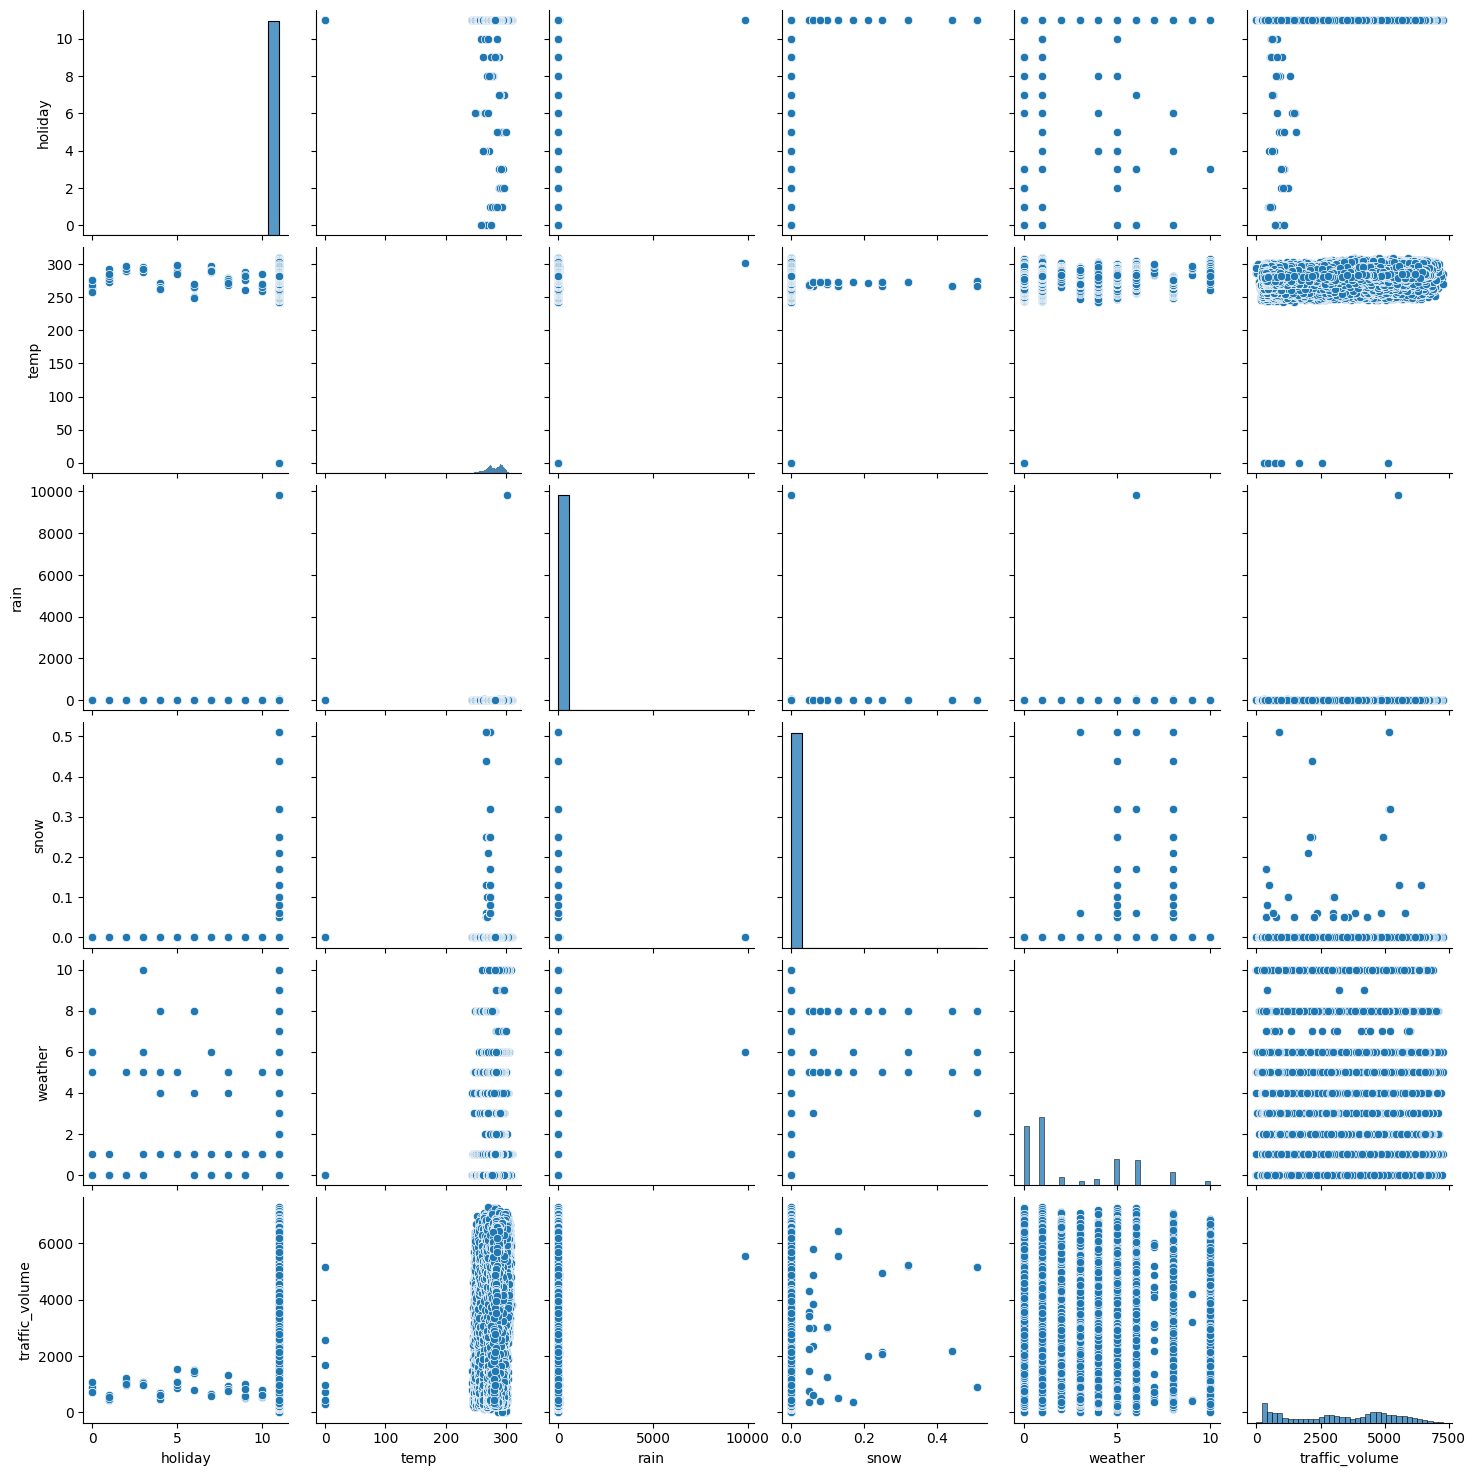

In [16]:
sns.pairplot(data)

<Axes: >

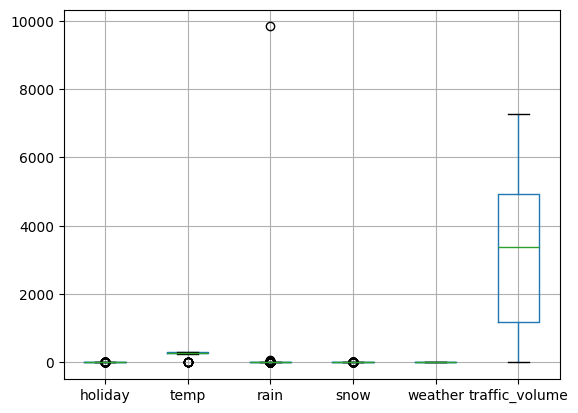

In [17]:
data.boxplot()

In [18]:
data.select_dtypes(include='number').corr()

,holiday,temp,rain,snow,weather,traffic_volume
holiday,1.000000,0.004646,0.000177,0.000863,-0.001851,0.038057
temp,0.004646,1.000000,0.009070,-0.019758,-0.033559,0.130034
rain,0.000177,0.009070,1.000000,-0.000090,0.009542,0.004714
snow,0.000863,-0.019758,-0.000090,1.000000,0.036662,0.000735
weather,-0.001851,-0.033559,0.009542,0.036662,1.000000,-0.040035
traffic_volume,0.038057,0.130034,0.004714,0.000735,-0.040035,1.000000


In [19]:
data[["day", "month","year"]] = data["date"].str.split("-", expand = True)
data[["hours","minutes", "seconds"]] = data["Time"].str.split(":", expand = True)
data.drop(columns=['date','Time'],axis=1,inplace=True)
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,11,288.28,0.0,0.0,1,5545,02,10,2012,9,00,00
1,11,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,11,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,11,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,11,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00


In [20]:
y = data['traffic_volume']
x = data.drop(columns=['traffic_volume'],axis=1)

In [21]:
names = x.columns

In [22]:
from sklearn.preprocessing import scale
x=scale(x)
# Drop the 'holiday' and 'weather' columns as they are categorical
#x = x.drop(columns=['holiday', 'weather'])

# Apply scaling to the remaining numerical columns
#x = scale(x)
x = pd.DataFrame(x, columns=names) # Recreate DataFrame with column names
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.031687,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.031687,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.031687,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.031687,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.031687,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


Model building

Training and testing model

In [24]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost



In [25]:

lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()


In [26]:
lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr.fit(x_train, y_train)
XGB.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [27]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)


Model Evaluation

In [28]:
from sklearn import metrics

print(metrics.r2_score(p1, y_train))
print(metrics.r2_score(p2, y_train))
print(metrics.r2_score(p3, y_train))
print(metrics.r2_score(p4, y_train))
print(metrics.r2_score(p5, y_train))


-5.50151590973192
1.0
0.9746882870112653
-12.206690423423506
0.8463600277900696


In [29]:
p1 = lin_reg.predict(x_test)
p2 = Dtree.predict(x_test)
p3 = Rand.predict(x_test)
p4 = svr.predict(x_test)
p5 = XGB.predict(x_test)

from sklearn import metrics

print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))


-5.365817964773315
0.6902717028679766
0.8029505915012028
-11.990577978126488
0.8047676682472229


In [30]:
MSE=metrics.mean_squared_error(p3,y_test)

In [31]:
np.sqrt(MSE)

np.float64(799.3195405130616)

In [32]:
import pickle

In [33]:
Dtree.fit(x, y)


DecisionTreeRegressor()

In [35]:
# Train the Random Forest model
Rand = ensemble.RandomForestRegressor()
Rand.fit(x, y)

# Save the model
with open("model.pkl", "wb") as f:
    pickle.dump(Rand, f)

# Save the encoder (only if you have one)
import pickle
pickle.dump(le, open("encoder.pkl", "wb"))
